In [1]:
import pandas as pd
from pyproj import CRS
import geopandas as gpd
import numpy as np
from shapely.geometry import Point
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from shapely import wkt


List of Indiana's Babyfriendly hospitals downloaded from ISDH

In [2]:
df = pd.read_csv('IN_BabeFriendlyHosp.csv')

In [3]:
geo_df = gpd.GeoDataFrame(df, crs=CRS('EPSG:4326'), geometry= gpd.points_from_xy(df.long, df.lat))
geo_df.head()

,name,street,city,state,zipcode,phone,lat,long,occupation,babyfriendly,geometry
0,Adams Memorial Hospital,1100 Mercer Ave,Decatur,IN,46733,2607242145,40.81773,-84.91268,Hospital,1,POINT (-84.91268 40.81773)
1,Baptist Health Floyd,1850 State St,New Albany,IN,47150,8129495500,38.30051,-85.83441,Hospital,1,POINT (-85.83441 38.30051)
2,Bluffton Regional Medical Center,303 S Main St,Bluffton,IN,46714,2608243210,40.73735,-85.17136,Hospital,1,POINT (-85.17136 40.73735)
3,Cameron Memorial Community Hospital,416 E Maumee St,Angola,IN,46703,2606652141,41.63478,-84.99555,Hospital,1,POINT (-84.99555 41.63478)
4,Clark Memorial Hospital,1220 Missouri Ave,Jeffersonville,IN,47130,8122832142,38.28289,-85.74917,Hospital,1,POINT (-85.74917 38.28289)


<AxesSubplot:>

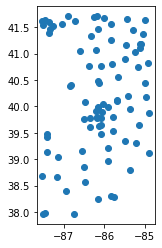

In [4]:
geo_df.plot()

The IN Counties shapefiles downloaded from: https://maps.indiana.edu/layerGallery.html?category=Census

In [5]:

in_cou = gpd.read_file('Census_Counties/Census_County_TIGER00_IN.shp')
in_cou.head()

,AREA,PERIMETER,NAME_U,NAME_L,NCAPC,CNTY_FIPS,STFID,POP2000,WHITE,BLACK,...,MARHH_NO_C,MHH_CHILD,FHH_CHILD,FAMILIES,AVE_FAM_SZ,HSE_UNITS,VACANT,OWNER_OCC,RENTER_OCC,geometry
0,8.352031e+08,116410.31836,STEUBEN,Steuben,76,151,18151,33214,32281,123,...,4208,375,715,8911,3.00,17337,4599,9951,2787,"POLYGON ((679527.291 4625396.026, 681172.040 4..."
1,1.001560e+09,129036.36824,LAGRANGE,Lagrange,44,087,18087,34909,33770,66,...,3777,249,434,8856,3.54,12938,1713,9151,2074,"POLYGON ((648336.954 4624638.241, 649912.369 4..."
2,1.211453e+09,139308.15005,ELKHART,Elkhart,20,039,18039,182791,157931,9551,...,19981,1839,4636,47659,3.18,69791,3637,47769,18385,"POLYGON ((609782.908 4623876.537, 611399.543 4..."
3,1.194457e+09,155508.91992,ST JOSEPH,St Joseph,71,141,18141,265559,218706,30422,...,28122,2148,7865,66802,3.07,107013,6270,72194,28549,"POLYGON ((576360.816 4623609.402, 577920.195 4..."
4,1.620569e+09,177807.09411,LAKE,Lake,45,089,18089,484564,323290,122723,...,49444,3671,16887,127036,3.19,194992,13359,125249,56384,"POLYGON ((458433.478 4623270.678, 481438.856 4..."


There are 92 rows, for 92 counties in Indiana. 

In [6]:
in_cou.shape

(92, 44)

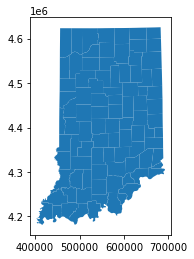

In [7]:
in_cou.plot()
plt.show()

Make sure both datasets have the same coordinate reference system. 

In [8]:
in_cou.geometry = in_cou.geometry.to_crs(epsg = 4326)
geo_df.geometry = geo_df.geometry.to_crs(epsg = 4326)

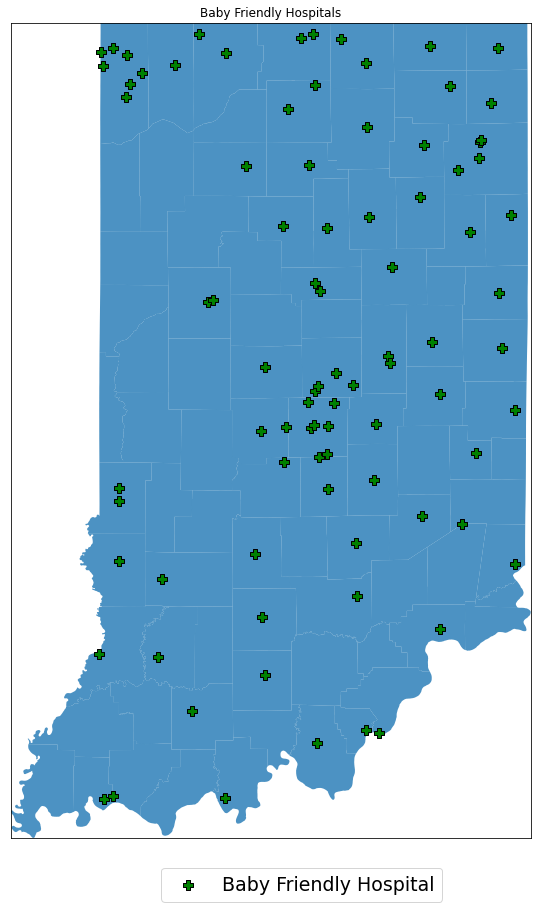

In [9]:
fig, ax = plt.subplots(figsize=(15,15))

minx, miny, maxx, maxy = in_cou.total_bounds
ax.set_xlim(minx, maxx)
ax.set_ylim(miny, maxy)
ax.set_aspect('auto')
plt.xticks([])
plt.yticks([])

plt.title("Baby Friendly Hospitals")

in_cou.plot(ax=ax, alpha=0.8)
geo_df.plot(ax=ax, marker='P',edgecolor='k', markersize=100, c='green',alpha= 1, label= "Baby Friendly Hospital")



plt.legend(prop={"size": 19},bbox_to_anchor=(0.56, -.09), loc='lower center', ncol=3)

    


plt.show()